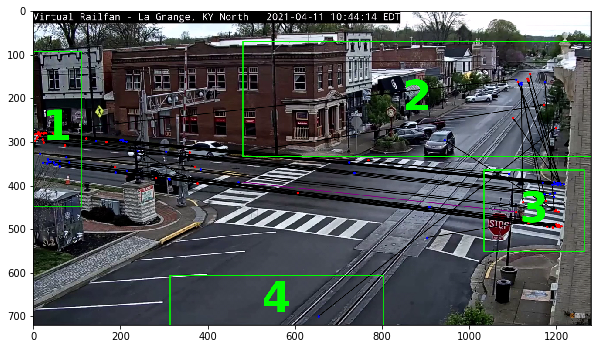

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
from ast import literal_eval
import pickle
import cv2 as cv2

filename = "La_Grange_Kentucky_USA_60_6_vric"
##videoname = "KFC"

MIN_DISTANCE = 100
#df = pd.read_csv(f"classified_data_{filename}.csv",converters={"bbox": literal_eval,"last_3x":literal_eval,"last_3y":literal_eval})
df = pickle.load(open(f"classified_data_{filename}.pkl","rb"))


##vidcap = cv2.VideoCapture(f"./data/{videoname}.mp4")
WIDTH = int(vidcap.get(cv2.CAP_PROP_FRAME_WIDTH))  
HEIGHT = int(vidcap.get(cv2.CAP_PROP_FRAME_HEIGHT))
my_dpi = 96

plt.figure(figsize=(10,16))
im = plt.imread( f"regions_{filename}.png")
plt.imshow(im)

In [23]:
directions = [(1,2),(1,3),(2,1),(2,3),(3,1)]


In [24]:
print("Cars:")
cars_entry = df.loc[df["class"] == "car"]["entry_box"].value_counts()
print(cars_entry)
print("Motorcycles:")
motorcycle_entry = df.loc[df["class"] == "motorcycle"]["entry_box"].value_counts()
print(motorcycle_entry)
print("Buses:")
bus_entry = df.loc[df["class"] == "bus"]["entry_box"].value_counts()
print(bus_entry)
print("Trucks:")
truck_entry = df.loc[df["class"] == "truck"]["entry_box"].value_counts()
print(truck_entry)

entry_dfs = [cars_entry,motorcycle_entry,truck_entry,bus_entry]

Cars:
3    21
0    16
1    13
2     6
4     1
Name: entry_box, dtype: int64
Motorcycles:
Series([], Name: entry_box, dtype: int64)
Buses:
Series([], Name: entry_box, dtype: int64)
Trucks:
0    1
Name: entry_box, dtype: int64


In [25]:
print("Cars:")
cars_exit = df.loc[df["class"] == "car"]["exit_box"].value_counts()
print(cars_exit)
print(cars_exit.count())
print("Motorcycles:")
motorcycle_exit = df.loc[df["class"] == "motorcycle"]["exit_box"].value_counts()
print(motorcycle_exit)
print("Buses:")
bus_exit = df.loc[df["class"] == "bus"]["exit_box"].value_counts()
print(bus_exit)
print("Trucks:")
truck_exit = df.loc[df["class"] == "truck"]["exit_box"].value_counts()
print(truck_exit)

exit_dfs = [cars_exit,motorcycle_exit,truck_exit,bus_exit]

Cars:
1    22
3    19
0     9
2     7
Name: exit_box, dtype: int64
4
Motorcycles:
Series([], Name: exit_box, dtype: int64)
Buses:
Series([], Name: exit_box, dtype: int64)
Trucks:
3    1
Name: exit_box, dtype: int64


In [26]:
for item in zip(entry_dfs,exit_dfs,["car","motorcycle","truck","bus"]):
    print(item[2])
    for direction in directions:
        try:
            print(f"{direction[0]}->{direction[1]}: min: {min(item[0][direction[0]],item[1][direction[1]])}")
        except Exception:
            continue

car
1->2: min: 7
1->3: min: 13
2->1: min: 6
2->3: min: 6
3->1: min: 21
motorcycle
truck
bus
